Accuracy Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00        12

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



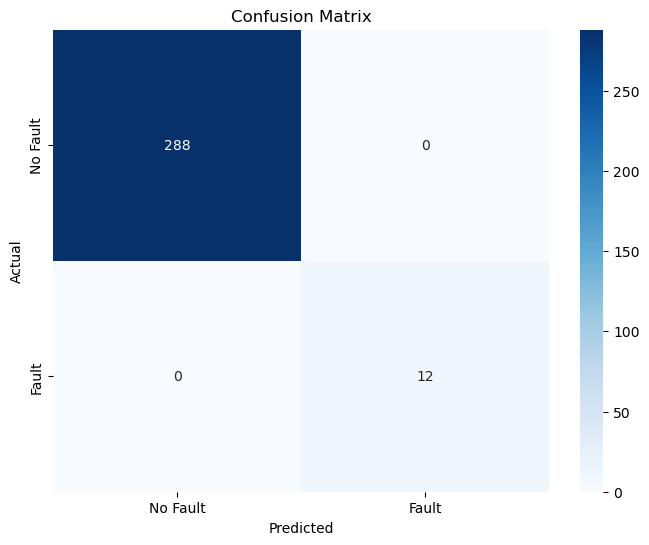

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
file_path = 'Smart grid.csv'
df = pd.read_csv(file_path)

# Create the Fault column using standard deviation
def detect_faults_std(data, column, threshold=3):
    mean = data[column].mean()
    std_dev = data[column].std()
    return ((data[column] < mean - threshold * std_dev) | (data[column] > mean + threshold * std_dev)).astype(int)

df['Fault'] = detect_faults_std(df, 'Voltage (V)') | detect_faults_std(df, 'Current (A)') | detect_faults_std(df, 'Power (S)')

# Splitting the dataset into features and labels
X = df[['Voltage (V)', 'Current (A)', 'Power (S)']]  # Features
y = df['Fault']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fault', 'Fault'], yticklabels=['No Fault', 'Fault'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


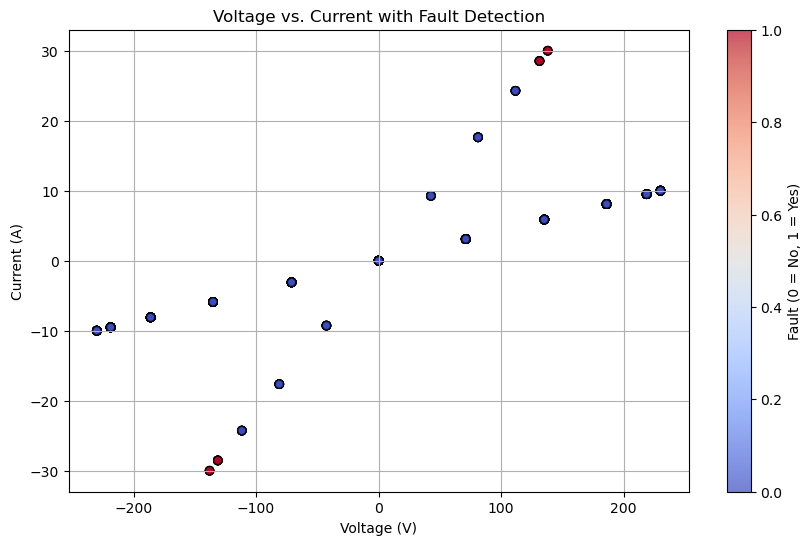

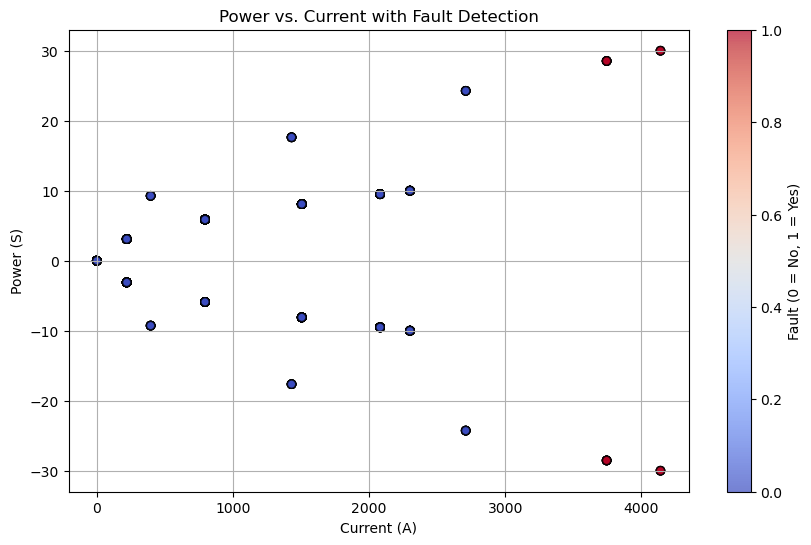

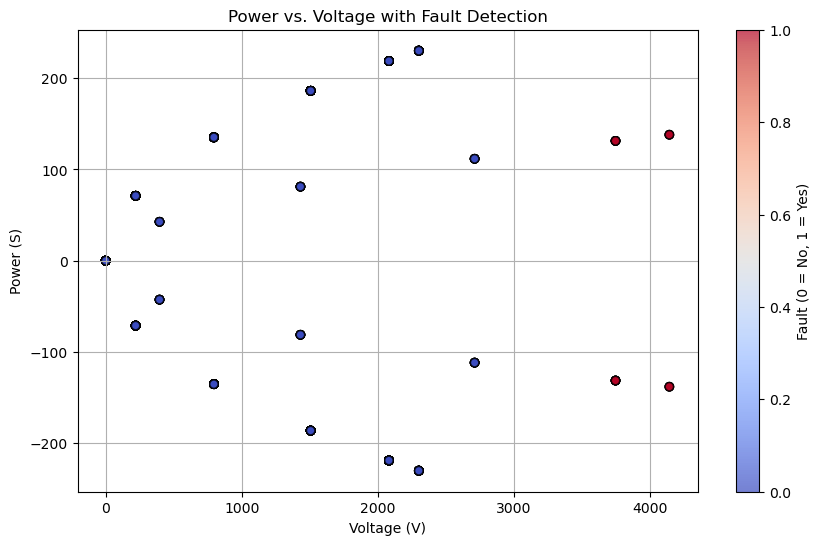

In [7]:
import matplotlib.pyplot as plt

# Plotting the voltage and current readings with fault points highlighted
plt.figure(figsize=(10, 6))
plt.scatter(df['Voltage (V)'], df['Current (A)'], c=df['Fault'], cmap='coolwarm', marker='o', edgecolor='k', alpha=0.7)
plt.colorbar(label='Fault (0 = No, 1 = Yes)')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage vs. Current with Fault Detection')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Power (S)'], df['Current (A)'], c=df['Fault'], cmap='coolwarm', marker='o', edgecolor='k', alpha=0.7)
plt.colorbar(label='Fault (0 = No, 1 = Yes)')
plt.xlabel('Current (A)')
plt.ylabel('Power (S)')
plt.title('Power vs. Current with Fault Detection')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Power (S)'], df['Voltage (V)'], c=df['Fault'], cmap='coolwarm', marker='o', edgecolor='k', alpha=0.7)
plt.colorbar(label='Fault (0 = No, 1 = Yes)')
plt.xlabel('Voltage (V)')
plt.ylabel('Power (S)')
plt.title('Power vs. Voltage with Fault Detection')
plt.grid(True)
plt.show()

In [8]:
# Filter rows where faults were detected
faults = df[df['Fault'] == 1][['Voltage (V)', 'Current (A)']]

# Display the voltage and current values for the classified faults
print(faults)


     Voltage (V)  Current (A)
204   131.245799    28.531695
205   138.000000    30.000000
206   131.245799    28.531695
214  -131.245799   -28.531695
215  -138.000000   -30.000000
216  -131.245799   -28.531695
224   131.245799    28.531695
225   138.000000    30.000000
226   131.245799    28.531695
234  -131.245799   -28.531695
235  -138.000000   -30.000000
236  -131.245799   -28.531695
244   131.245799    28.531695
245   138.000000    30.000000
246   131.245799    28.531695
254  -131.245799   -28.531695
255  -138.000000   -30.000000
256  -131.245799   -28.531695
264   131.245799    28.531695
265   138.000000    30.000000
266   131.245799    28.531695
274  -131.245799   -28.531695
275  -138.000000   -30.000000
276  -131.245799   -28.531695
284   131.245799    28.531695
285   138.000000    30.000000
286   131.245799    28.531695
294  -131.245799   -28.531695
295  -138.000000   -30.000000
296  -131.245799   -28.531695


In [10]:
voltage_input = 8.45E-14
current_input = 3.67E-15
input_data = pd.DataFrame([[voltage_input, current_input]], columns=['Voltage (V)', 'Current (A)'])
prediction = rf_classifier.predict(input_data)
if prediction[0] == 1:
    print("Fault Detected")  
else:
    print("No Fault Detected")


No Fault Detected
